In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
# 데이터 파일이 클 경우, nrows로 일부만 불러올 수 있습니다.
df = pd.read_csv("dataset_1.csv")
df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [3]:
# PeopleId는 예측과 관계 없으므로 제거
df = df.drop(columns=["PeopleId"])

# activityID 라벨 인코딩 (문자열 → 숫자)
le = LabelEncoder()
df['activityID'] = le.fit_transform(df['activityID'])

# X, y 분리
X = df.drop(columns=['activityID'])
y = df['activityID']

# 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클래스 수 확인
n_classes = len(le.classes_)
print(f"총 활동 클래스 수: {n_classes}")


총 활동 클래스 수: 13


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')  # 다중 클래스
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=512,
                    validation_split=0.2, verbose=1)

Epoch 1/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7098 - loss: 1.0084 - val_accuracy: 0.9347 - val_loss: 0.1910
Epoch 2/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.1684 - val_accuracy: 0.9599 - val_loss: 0.1195
Epoch 3/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9622 - loss: 0.1101 - val_accuracy: 0.9707 - val_loss: 0.0876
Epoch 4/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9733 - loss: 0.0802 - val_accuracy: 0.9768 - val_loss: 0.0689
Epoch 5/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9798 - loss: 0.0627 - val_accuracy: 0.9809 - val_loss: 0.0577
Epoch 6/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9833 - loss: 0.0516 - val_accuracy: 0.9858 - val_loss: 0.0459
Epoch 7/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9863 - loss: 0.0431 - val_accuracy: 0.9864 - val_loss: 0.0404
Epoch 8/100
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9876 - loss: 0.0375 - val_accu

In [7]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

3529/3529 ━━━━━━━━━━━━━━━━━━━━ 3s 855us/step - accuracy: 0.9973 - loss: 0.0085
Test Accuracy: 0.9971


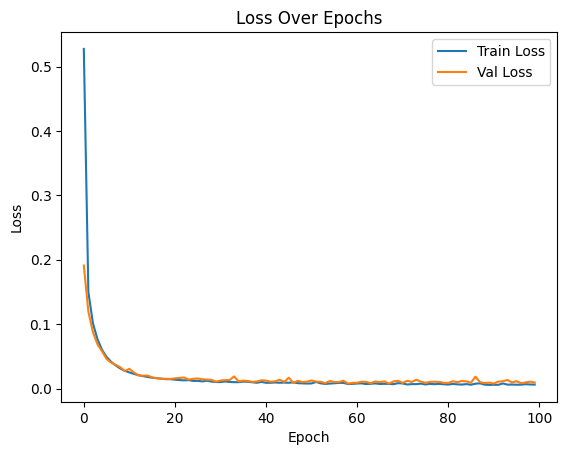

In [8]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3529/3529 ━━━━━━━━━━━━━━━━━━━━ 2s 629us/step


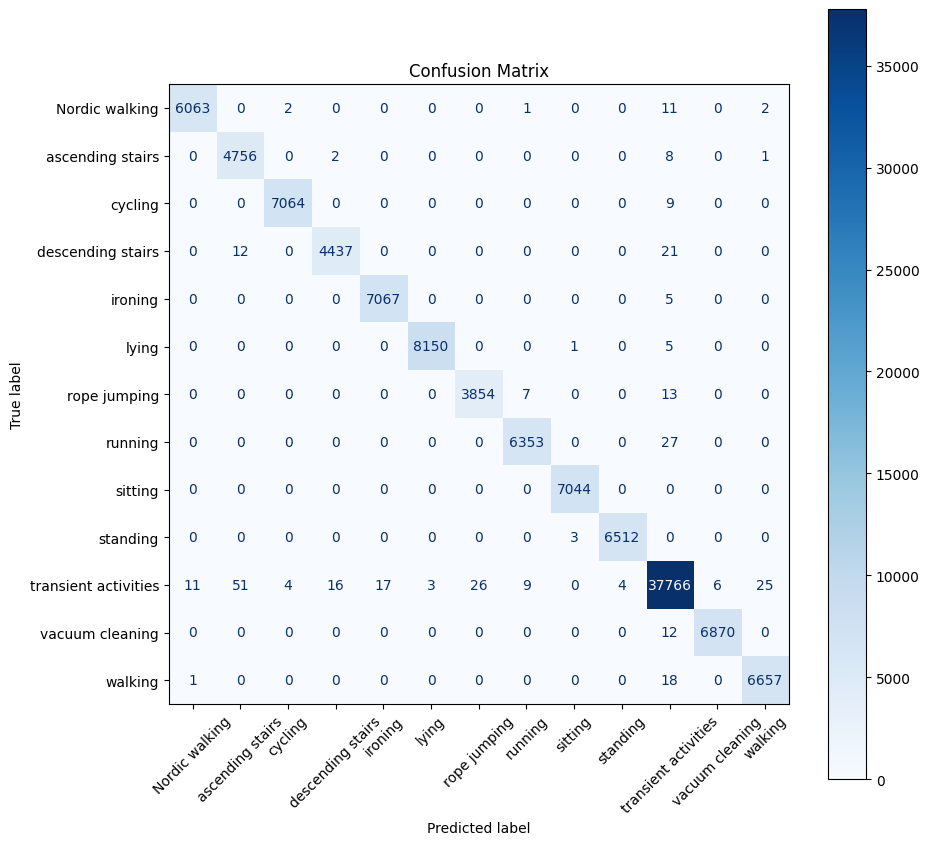

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 예측값 생성
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # softmax 결과에서 최대 확률의 클래스 추출

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 라벨 이름 복원
labels = le.classes_

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


3529/3529 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step


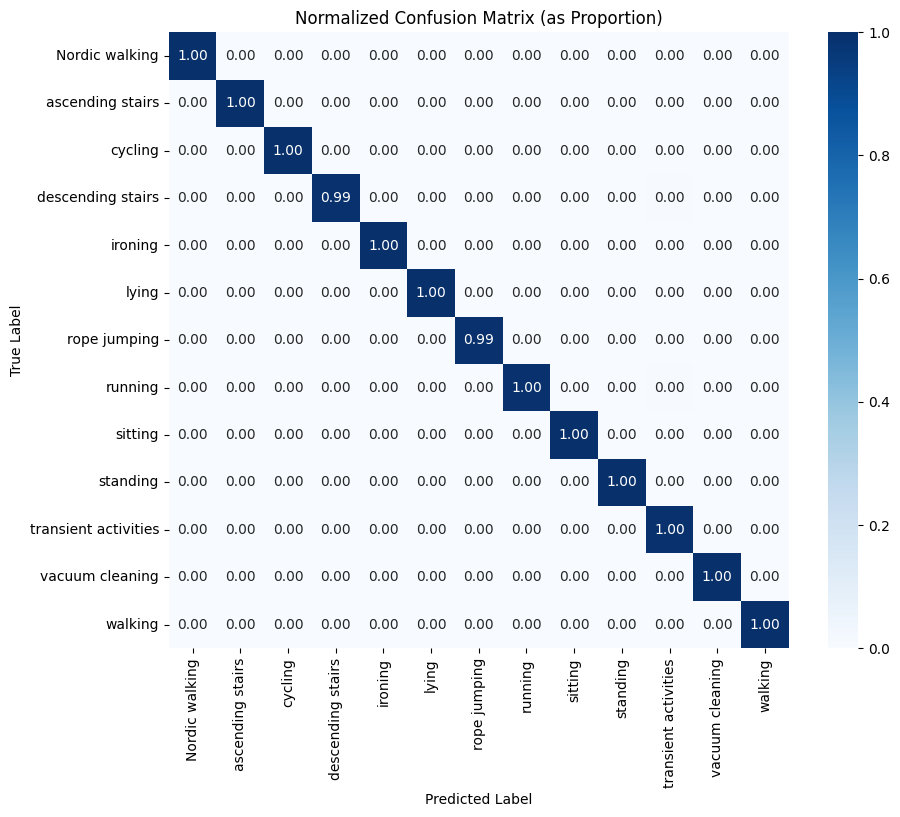

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값 생성 (이미 학습된 모델이 있다고 가정)
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 정규화 (행 단위, 즉 실제 클래스 기준 비율)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 클래스 라벨 (문자형으로 복원)
labels = le.classes_

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (as Proportion)")
plt.show()
